In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 상수 설정
a = 317.8 #(목성질량)/(지구질량)
b = 11.2 #(목성반지름)/(지구반지름)
pi = 3.14159

In [ ]:
# 데이터 불러오기
df = pd.read_csv('extrasolarplanet_data.csv')
df

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,6.8370,0.53200,0.53200,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.0,80.0,NaN,NaN,HD 10697
1,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.10,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,ZTFJ0220+21 b,Confirmed,14.0000,6.00000,6.00000,NaN,NaN,NaN,0.540,0.07,...,WD,NaN,NaN,NaN,14200.0,1000.0,1000.0,NaN,NaN,NaN
5901,ZTFJ0407-00 b,Confirmed,19.0000,3.00000,3.00000,NaN,NaN,NaN,0.440,0.02,...,WD,NaN,NaN,NaN,17400.0,1200.0,1200.0,NaN,NaN,NaN
5902,ZTF-J1622+47 b,Confirmed,61.0000,19.00000,19.00000,NaN,NaN,NaN,0.980,0.02,...,NaN,NaN,NaN,NaN,29000.0,NaN,NaN,NaN,NaN,NaN
5903,ZTFJ1637+49 b,Confirmed,23.0000,8.00000,8.00000,NaN,NaN,NaN,0.680,0.07,...,WD,NaN,NaN,NaN,11200.0,300.0,300.0,NaN,NaN,NaN


In [ ]:
# 'mass'와 'radius' 열만 추출하고 값이 없는 행 삭제
df = df[['mass', 'radius']].dropna()

In [ ]:
# density 열 추가
df['density'] = (3/(4*pi)) * (df['mass'] / ((4/3)*pi*(df['radius']**3)))

In [ ]:
# 'type1' 열 추가
def classify_mass(mass):
    if 10/a <= mass <= 10000/a:
        return 'jupiter'
    elif 0.1/a <= mass < 10/a:
        return 'terrestrial'
    else:
        return 'not'
df['type1'] = df['mass'].apply(classify_mass)

In [ ]:
# 'type2' 열 추가
def classify_radius(radius):
    if 1.5/b <= radius <= 11/b:
        return 'jupiter'
    elif 0.8/b <= radius < 1.5/b:
        return 'terrestrial'
    else:
        return 'not'
df['type2'] = df['radius'].apply(classify_radius)

In [ ]:
# 'type3' 열 추가
def classify_density(density):
    if 3 <= density <= 6:
        return 'terrestrial'
    elif 0.5 <= density < 1.5:
        return 'jupiter'
    else:
        return 'not'
df['type3'] = df['density'].apply(classify_density)

In [ ]:
# 'result' 열 추가
def determine_result(row):
    types = [row['type1'], row['type2'], row['type3']]
    not_count = types.count('not')

    if not_count == 3:
        return 'not'
    elif not_count == 2:
        return next(t for t in types if t != 'not')
    elif not_count == 1:
        remaining_types = [t for t in types if t != 'not']
        if remaining_types[0] == remaining_types[1]:
            return remaining_types[0]
        else:
            return 'not'
    else:
        # not_count == 0인 경우
        if types[0] == types[1] or types[0] == types[2]:
            return types[0]
        else:
            return types[1]

df['result'] = df.apply(determine_result, axis=1)

In [ ]:
df

,mass,radius,density,type1,type2,type3,result
0,6.8370,1.1520,0.254878,jupiter,not,not,jupiter
9,14.0000,1.7000,0.162407,jupiter,not,not,jupiter
16,0.0541,0.2221,0.281433,jupiter,jupiter,not,jupiter
23,13.9000,1.4400,0.265308,jupiter,not,not,jupiter
24,28.0000,1.2200,0.878824,jupiter,not,jupiter,jupiter
...,...,...,...,...,...,...,...
5900,14.0000,0.5400,5.067226,jupiter,jupiter,terrestrial,jupiter
5901,19.0000,0.4400,12.712152,jupiter,jupiter,not,jupiter
5902,61.0000,0.9800,3.693815,not,jupiter,terrestrial,not
5903,23.0000,0.6800,4.168930,jupiter,jupiter,terrestrial,jupiter


In [ ]:
df_terr=df[df['result']=='terrestrial']
df_jupi=df[df['result']=='jupiter']

df_terr

,mass,radius,density,type1,type2,type3,result
307,0.005220,0.10350,0.268332,terrestrial,terrestrial,not,terrestrial
310,0.004150,0.10530,0.202575,terrestrial,terrestrial,not,terrestrial
313,0.011640,0.07958,1.316330,terrestrial,terrestrial,jupiter,terrestrial
362,0.005850,0.11277,0.232487,terrestrial,terrestrial,not,terrestrial
366,0.006566,0.10411,0.331625,terrestrial,terrestrial,not,terrestrial
...,...,...,...,...,...,...,...
5601,0.001300,0.06890,0.226521,terrestrial,not,not,terrestrial
5602,0.002000,0.08190,0.207492,terrestrial,terrestrial,not,terrestrial
5603,0.002100,0.09323,0.147698,terrestrial,terrestrial,not,terrestrial
5604,0.004220,0.10050,0.236940,terrestrial,terrestrial,not,terrestrial


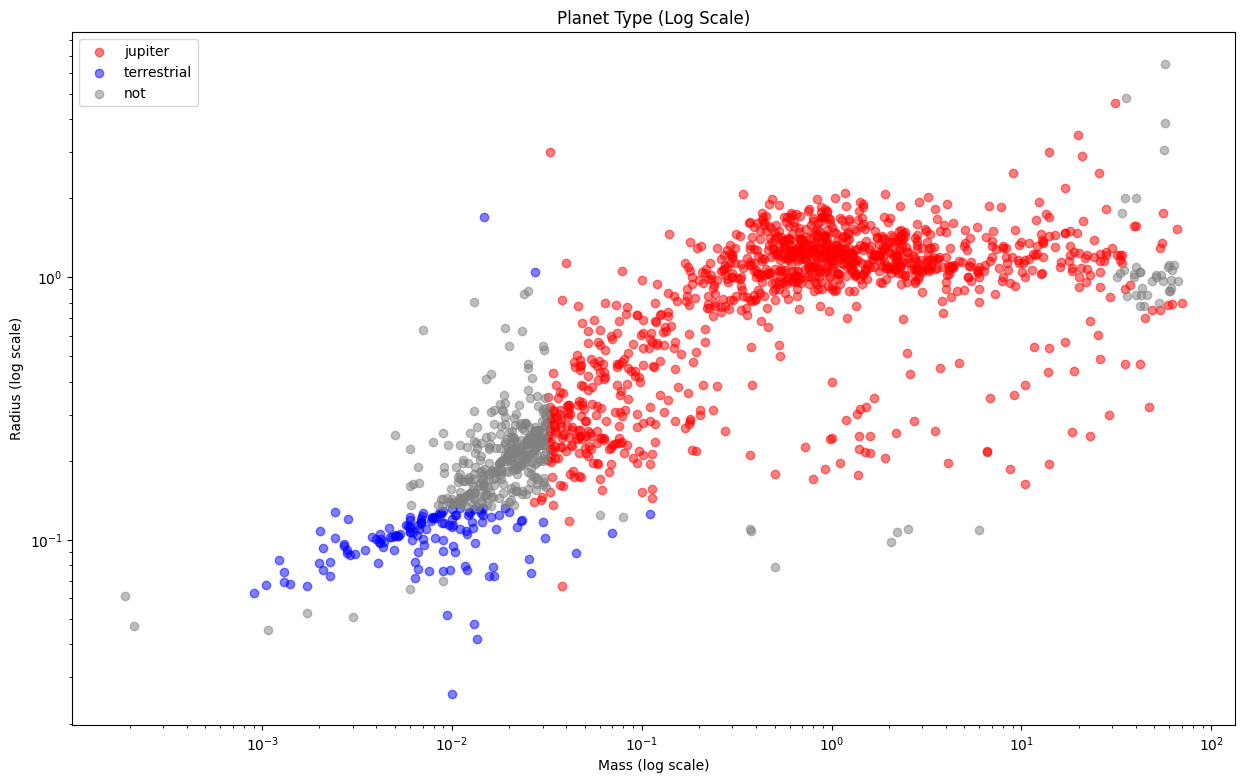

In [ ]:
#산점도 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))

# 'jupiter'에 대한 산점도
jup_df = df[df['result'] == 'jupiter']
plt.scatter(jup_df['mass'], jup_df['radius'], color='red', label='jupiter', alpha=0.5)

# 'terrestrial'에 대한 산점도
terr_df = df[df['result'] == 'terrestrial']
plt.scatter(terr_df['mass'], terr_df['radius'], color='blue', label='terrestrial', alpha=0.5)

# 'not'에 대한 산점도
not_df = df[df['result'] == 'not']
plt.scatter(not_df['mass'], not_df['radius'], color='grey', label='not', alpha=0.5)

# 로그 스케일 적용
plt.xscale('log')
plt.yscale('log')

# 그래프 제목과 축 라벨 설정
plt.title('Planet Type (Log Scale)')
plt.xlabel('Mass (log scale)')
plt.ylabel('Radius (log scale)')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()